# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#!pip install  --upgrade tweepy==4.4

In [2]:
import pandas as pd
import numpy as np
import json
import requests
import os
from PIL import Image
from io import BytesIO

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 110) 
pd.set_option('display.max_rows', None)

In [3]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_url)
with open ('image_predictions.tsv', 'wb') as f:
    f.write(response.content)
df_images = pd.read_csv('image_predictions.tsv', sep='\t')

In [5]:
df_images.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer



# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)


# tweet_ids = df_twitter.tweet_id.values
# len(tweet_ids)

# tweet_fields = ['id', 'public_metrics', 'source', 'text']

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_fields=tweet_fields)
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except Exception as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
#         if count == 10:
#             break
# end = timer()
# print(end - start)
# print(fails_dict)

In [7]:
# initialize df_tweets dataframe
df_tweets = pd.DataFrame()

In [8]:
# write data from tweet_json.txt into df_tweets dataframe

with open("tweet_json.txt") as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        
        df_tweets = df_tweets.append(pd.DataFrame([[tweet_id,retweet_count,favorite_count]],
                                columns=['tweet_id','retweet_count','favorite_count']))
                
df_tweets = df_tweets.reset_index(drop=True)

In [9]:
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, sn...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be re...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/89132...",12,10,Franklin,None,None,None,None


In [10]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
# export dataframes to excel for visual exam
df_twitter.to_excel('df_twitter.xlsx', sheet_name='df_twitter', index = False)
df_images.to_excel('df_images.xlsx', sheet_name='df_images', index = False)
df_tweets.to_excel('df_tweets.xlsx', sheet_name='df_tweets', index = False)

In [13]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [16]:
# investigate min, max, mean for numerator and denominator values
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# investigate all the range of values for numerator and denominator
df_twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [18]:
sum(df_twitter.tweet_id.duplicated()),sum(df_images.tweet_id.duplicated()),sum(df_tweets.tweet_id.duplicated())

(0, 0, 0)

In [19]:
sum(df_twitter.expanded_urls.duplicated())

137

In [20]:
sum(df_images.jpg_url.duplicated())

66

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
1. (df_twitter) there are 181 retweets that needs to be taken out of ratings

2. (df_twitter) remove unnecessary columns with NaN values (in-reply_to_status_id, in_reply_to_user_id, retweet_status_id, retweet_status_user_id, retweet_status_timestamp)

3. (df_twitter) wrong data types in some columns such as tweet_id, timestamp, rating_numerator, and rating_denominator

4. (df_images) wrong data type in tweet_id column 

5. (df_twitter) incorrect names(a, all, by, etc.)

6. (df_twitter) no calculated 'rating' column 

7. (df_twitter) incorrect numbers in rating_denominator

8. (df_images) p1, p2, p3 columns have mixed case text


### Tidiness issues
1. columns 'doggo, floofer, pupper, puppo' should be condensed into one column as 'dog_stages'

2. df_twitter, df_images, and df_tweets should be merged onto one table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
df1_clean = df_twitter.copy()
df2_clean= df_images.copy()
df3_clean = df_tweets.copy()

### Issue #1:

#### Define:
- Remove 181 rows with retweeted id and timestamp data

#### Code

In [22]:
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]
df1_clean = df1_clean[df1_clean['retweeted_status_user_id'].isnull()]
df1_clean = df1_clean[df1_clean['retweeted_status_timestamp'].isnull()]

#### Test

In [23]:
df1_clean.retweeted_status_id.isnull().sum()

2175

In [24]:
df1_clean.retweeted_status_user_id.isnull().sum()

2175

In [25]:
df1_clean.retweeted_status_timestamp.isnull().sum()

2175

### Issue #2:

#### Define:
- Remove unnecessary columns with NaN values

#### Code

In [26]:
df1_clean = df1_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                           'retweeted_status_timestamp'], axis=1)

#### Test

In [27]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #3:

#### Define:
- Change data types of tweet_id, timestamp, rating_numerator, rating_denominator in df_twitter

#### Code

In [28]:
df1_clean['tweet_id']= df1_clean['tweet_id'].astype(str)
df1_clean['timestamp'] =df1_clean['timestamp'].astype('datetime64')
df1_clean['rating_numerator'] = df1_clean['rating_numerator'].astype(float)
df1_clean['rating_denominator'] = df1_clean['rating_denominator'].astype(float)

#### Test

In [29]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   float64       
 6   rating_denominator  2175 non-null   float64       
 7   name                2175 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 220.9+ KB


### Issue #4:

#### Define:
- Change data types in tweet_id column in images data

#### Code

In [30]:
df2_clean['tweet_id']= df2_clean['tweet_id'].astype(str)

#### Test

In [31]:
df2_clean['tweet_id'].dtype

dtype('O')

### Issue #5:

#### Define:
- Change incorrect names to 'None'

#### Code

In [32]:
df1_clean[df1_clean.name.str.islower()].name.value_counts()
reveal = df1_clean.name.str.contains('^[a-z]', regex = True)
df1_clean[reveal].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [33]:
# Replace all incorrect names with 'None'
df1_clean.loc[reveal, "name"] = "None"

#### Test

In [34]:
df1_clean.name.value_counts().sample(10)

Chip         4
Smiley       1
Callie       1
Blipson      1
Shaggy       1
Lilly        1
Ellie        3
Hubertson    1
Kial         1
Jay          1
Name: name, dtype: int64

### Tidiness Issue #1:

#### Define:
- Merge columns 'doggo, floofer, pupper, puppo' into one column as 'dog_stages'
- Drop the columns

#### Code

In [35]:
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

In [36]:
df1_clean['dog_stages'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo 

In [37]:
df1_clean.dog_stages.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stages, dtype: int64

In [38]:
df1_clean.dog_stages = df1_clean.dog_stages.replace('doggopupper','doggo,pupper')
df1_clean.dog_stages = df1_clean.dog_stages.replace('doggopuppo','doggo,puppo')
df1_clean.dog_stages = df1_clean.dog_stages.replace('doggofloofer','doggo,floofer')
df1_clean.dog_stages.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

In [39]:
df1_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

#### Test

In [40]:
sum(df1_clean.dog_stages.isnull())

0

In [41]:
df1_clean.dog_stages.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

### Tidiness Issue #2:

#### Define:
- Merge all three dataframes into one

#### Code

In [42]:
# check to see if tweet_ids all match in the dataframes
df1_clean.tweet_ids = df1_clean.tweet_id.values  

len([x for x in df2_clean.tweet_id.values if x in df1_clean.tweet_ids])

/Users/secil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


1994

In [43]:
# compare the ids from df_1 to df_3 to make sure they match  
df1_clean.tweet_ids = df1_clean.tweet_id.values  
len([x for x in df3_clean.tweet_id.values if x in df1_clean.tweet_ids])

2175

In [44]:
# check to see if there are any duplicated tweet_id's
sum(df1_clean.tweet_id.duplicated()),sum(df2_clean.duplicated()),sum(df3_clean.duplicated())

(0, 0, 0)

In [45]:
# merge df1_clean and df3_clean dataframes
merged = pd.merge(df1_clean, df3_clean, on='tweet_id', how='inner')

In [46]:
# merge the merged dataframe with df2_clean dataframe
df_final = pd.merge(merged, df2_clean, on='tweet_id', how='inner')

#### Test

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   source              1994 non-null   object        
 3   text                1994 non-null   object        
 4   expanded_urls       1994 non-null   object        
 5   rating_numerator    1994 non-null   float64       
 6   rating_denominator  1994 non-null   float64       
 7   name                1994 non-null   object        
 8   dog_stages          1994 non-null   object        
 9   retweet_count       1994 non-null   int64         
 10  favorite_count      1994 non-null   int64         
 11  jpg_url             1994 non-null   object        
 12  img_num             1994 non-null   int64         
 13  p1                  1994 non-null   object      

### Issue #6:

#### Define:
- Create a column 'rating' and calculate rating ratio

#### Code

In [48]:
# create a new column 'rating' and calcualte values for it
df_final['rating'] = df_final['rating_numerator']/ df_final['rating_denominator']

#### Test

In [49]:
df_final.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,1.3


In [50]:
# investigate if there are any rows that have more than 1.4 rating ratio
df_final[df_final.rating> 1.4]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
385,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and shar...,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,3.428571
503,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 h...",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75.0,10.0,Logan,,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,7.500000
553,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the lo...,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27.0,10.0,Sophie,pupper,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,2.700000
726,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,,2772,5569,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,177.600000
1374,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26.0,10.0,None,,542,1879,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,2.600000
1718,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,None,,4324,7989,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,42.000000


### Issue #7:

#### Define:
- Change denominators that are out of range 
- upon closer examination, decided it was not necessary since the rating ratios are acceptable even though the denominators seem out of range

#### Code

In [51]:
df_final.rating_denominator.value_counts()

10.0     1976
50.0        3
11.0        2
80.0        2
70.0        1
7.0         1
150.0       1
170.0       1
20.0        1
90.0        1
40.0        1
130.0       1
110.0       1
120.0       1
2.0         1
Name: rating_denominator, dtype: int64

#### Test

In [52]:
# examine the rows with unusual denominator value
df_final[df_final.rating_denominator > 10].sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
1130,697463031882764288,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40.0,None,,1552,3748,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True,1.1
988,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would...",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,None,,721,2634,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,0.9
891,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,None,,1764,4493,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True,0.2


### Issue #8:

#### Define:
- Turn all breed predictions in p1, p2, p3 to lower case

#### Code

In [53]:
df_final.p1= df_final.p1.str.lower()
df_final.p2= df_final.p2.str.lower()
df_final.p3= df_final.p3.str.lower()

#### Test

In [54]:
df_final.p1.value_counts().head(10)

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
toy_poodle             38
pomeranian             38
malamute               29
Name: p1, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [55]:
df_master = df_final.copy()

In [56]:
df_master.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [57]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   source              1994 non-null   object        
 3   text                1994 non-null   object        
 4   expanded_urls       1994 non-null   object        
 5   rating_numerator    1994 non-null   float64       
 6   rating_denominator  1994 non-null   float64       
 7   name                1994 non-null   object        
 8   dog_stages          1994 non-null   object        
 9   retweet_count       1994 non-null   int64         
 10  favorite_count      1994 non-null   int64         
 11  jpg_url             1994 non-null   object        
 12  img_num             1994 non-null   int64         
 13  p1                  1994 non-null   object      

In [58]:
df_master.dog_stages.value_counts()

                 1688
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

In [59]:
pd.set_option('display.max_columns', None)

In [60]:
df_master[df_master.retweet_count == 1124]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
876,726828223124897792,2016-05-01 17:38:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bloop. He's a Phoenician Winnebago. Tongue is just wow. That box is all he has (tragic). 12/10 wou...,https://twitter.com/dog_rates/status/726828223124897792/photo/1,12.0,10.0,Bloop,,1124,3882,https://pbs.twimg.com/media/ChY2aHyWMAAbNQE.jpg,1,miniature_pinscher,0.255327,True,border_terrier,0.181279,True,labrador_retriever,0.125185,True,1.2
1049,704499785726889984,2016-03-01 02:53:32,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you wake up from a long nap and have no idea who you are. 12/10 https://t.co/dlF93GLnDc,https://twitter.com/dog_rates/status/704499785726889984/photo/1,12.0,10.0,None,,1124,3212,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,chihuahua,0.376541,True,siamese_cat,0.098057,False,labrador_retriever,0.085211,True,1.2
1259,687102708889812993,2016-01-13 02:43:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/...,https://twitter.com/dog_rates/status/687102708889812993/photo/1,5.0,10.0,None,,1124,2571,https://pbs.twimg.com/media/CYkURJjW8AEamoI.jpg,1,fiddler_crab,0.992069,False,quail,0.002491,False,rock_crab,0.001513,False,0.5
1295,684800227459624960,2016-01-06 18:14:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Theodore. He's dapper as hell. Probably owns horses. Uses 'summer' as a verb. Often quotes philosophe...,https://twitter.com/dog_rates/status/684800227459624960/photo/1,11.0,10.0,Theodore,,1124,2979,https://pbs.twimg.com/media/CYDmK7ZVAAI_ylL.jpg,1,miniature_schnauzer,0.294457,True,norfolk_terrier,0.161885,True,west_highland_white_terrier,0.120992,True,1.1


In [61]:
df_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000
mean,12.280843,10.532096,2766.753260,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02,1.169249
std,41.497718,7.320710,4674.698447,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02,4.067071
min,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,624.750000,1982.000000,1.000000,0.362857,5.393987e-02,1.619283e-02,1.000000
50%,11.000000,10.000000,1359.500000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1.100000
75%,12.000000,10.000000,3220.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,1.200000
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


In [62]:
# most retweeted 

#df_master[df_master.retweet_count == 79515]

In [63]:
# most favored
#df_master[df_master.favorite_count == 132810]

In [64]:
df_master.name.value_counts().head(10)

None       644
Charlie     11
Cooper      10
Lucy        10
Oliver      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Toby         7
Name: name, dtype: int64

In [65]:
df_master.p1.value_counts().head(10)

golden_retriever      139
labrador_retriever     95
pembroke               88
chihuahua              79
pug                    54
chow                   41
samoyed                40
toy_poodle             38
pomeranian             38
malamute               29
Name: p1, dtype: int64

### Insights:
1. There is a high correlation between retweet_count and favotire_count

2. The most recognised dog image is Golden Retriever

3. Most common dog names are 'Charlie, Cooper, Lucy, Oliver'

### Visualization

In [66]:
import matplotlib.pyplot as plt

In [67]:
# correlation between retwwet_count and favorite_count
result = df_master.retweet_count.corr(df_master.favorite_count)
result

0.9129466274183702

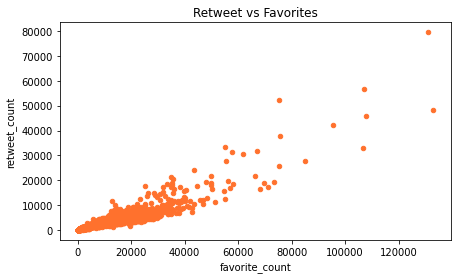

In [68]:
df_master.plot(y='retweet_count', x='favorite_count',kind='scatter', figsize=(7,4), color = '#ff712d', title='Retweet vs Favorites');
plt.savefig('fig1.png')

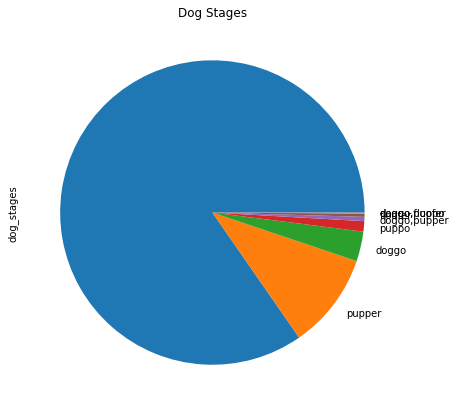

In [70]:
labels = np.full(len(df_master.dog_stages.value_counts()), '', dtype=object)
df_master.dog_stages.value_counts().plot(kind='pie', figsize=(7,7), title='Dog Stages');
plt.savefig('fig2.png')